In [39]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import numpy as np

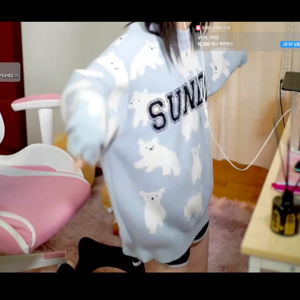

In [45]:
img = Image.open("규리.png")

img.resize(np.array([100, 100]) * 3)

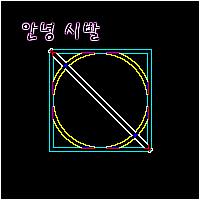

In [43]:
size = (200, 200)

# 바탕 이미지 생성
dImg = Image.new("RGB", size, "white")
draw = ImageDraw.Draw((dImg))

#폰트 설정
font = ImageFont.truetype("../Font/HMFMPYUN.TTF", 20)

draw.line((50, 50, 150, 150), fill="black", width=3)
draw.ellipse((50, 50, 150, 150), outline="blue", width=3)
draw.rectangle((50, 50, 150, 150), outline="red", width=3)
draw.text((20, 20), "안녕 시발", fill="green", font=font)

dImg.filter(ImageFilter.FIND_EDGES)

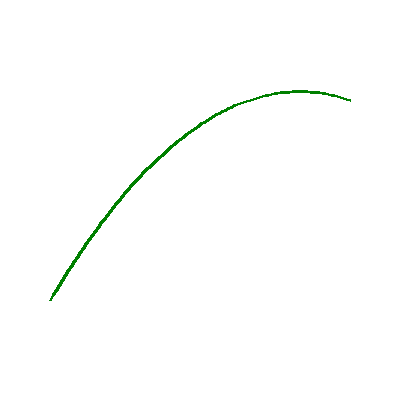

In [48]:
img = Image.new("RGB", (400, 400), "white")
draw = ImageDraw.Draw(img)

# 베지어 곡선을 이루는 점들 계산 (Quadratic Bezier)
def bezier_curve(p0, p1, p2, num_points=100):
    t = np.linspace(0, 1, num_points)
    curve = [(int((1-t_)**2 * p0[0] + 2*(1-t_)*t_*p1[0] + t_**2 * p2[0]),
              int((1-t_)**2 * p0[1] + 2*(1-t_)*t_*p1[1] + t_**2 * p2[1])) for t_ in t]
    return curve

# 제어점 설정
p0, p1, p2 = (50, 300), (200, 50), (350, 100)
bezier_points = bezier_curve(p0, p1, p2)

# 점들을 연결하는 곡선 그리기
draw.line(bezier_points, fill="green", width=3)

img